# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [7]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

## Work begins

In [33]:
import numpy as np
import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro, normaltest, anderson
from matplotlib import pyplot
from scipy.stats import norm
from scipy import stats
import plotly.figure_factory as ff

init_notebook_mode(connected=True)

In [9]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


### 1. Is the distribution of body temperatures normal? 

In [10]:
trace0 = go.Histogram(x=df.temperature, nbinsx=10)

iplot([trace0], filename='temp_hist.html')

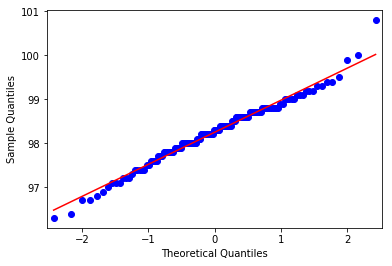

In [11]:
qqplot(df.temperature, line='s')
pyplot.show()

#### D’Agostino’s K-squared Test

In [12]:
stat, p = normaltest(df.temperature)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=2.704, p=0.259
Sample looks Gaussian (fail to reject H0)


#### Shapiro-Wilks Test

In [13]:
stat, p = shapiro(df.temperature)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.987, p=0.233
Sample looks Gaussian (fail to reject H0)


#### Anderson-Darling Test

In [14]:
result = anderson(df.temperature)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 0.520
15.000: 0.560, data looks normal (fail to reject H0)
10.000: 0.637, data looks normal (fail to reject H0)
5.000: 0.765, data looks normal (fail to reject H0)
2.500: 0.892, data looks normal (fail to reject H0)
1.000: 1.061, data looks normal (fail to reject H0)


The above tests all indicate that the distribution of body temperatures can be treated as normal.

### 2. Is the sample size large? Are the observations independent? 

In [15]:
print('Number of samples: %s' % str(len(df)))

Number of samples: 130


The number of samples is much larger than 40 so we can say the sample size is large. We can also assume the observations are independent since the measurements of body temperature for each person should not depend on each other.

### 3. Is the true population mean really 98.6 degrees F?

The null hypothesis is that the true population mean is 98.6. This is the same as saying that the sample population has a mean of 98.6 since it was drawn from the population. Of course it's assumed this was done randomly and unbiased.

H0: 98.6 - xbar = 0

The alternate hypothesis is that the true population mean is not 98.6. This is the same as saying that the sample population is not equal to 98.6 and likely was not drawn from a true population who's mean is 98.6.

Ha: 98.6 - Xbar != 0

For my tests, I choose the 95% confidence level with a critical value of alpha=0.05.

In [16]:
x_bar = df.temperature.mean()
x_std = df.temperature.std()

print('Sample mean: %s' % x_bar)
print('Sample std: %s' % x_std)

Sample mean: 98.24923076923078
Sample std: 0.7331831580389454


#### Bootstrap approach:

For the bootstrap approach I will use the following strategy:

1. Use the sample mean and sample standard deviation to draw random bootstrap samples from a normal distribution with the same mean and standard deviation.
2. For each of these samples I will take the difference from 98.6.
3. I will then use the distribution of those differences to see if it's centered around 0, which would be the case if the null hypothesis was true.

In [17]:
def create_bootstraps(data, value=None, n_bootstraps=100, stat='mean'):

    # create empty array to store test statistic from bootstrap samples
    bootstrap_stats = np.empty(n_bootstraps)

    for i in range(0, n_bootstraps):

        # generate a bootstrap sample of size equal to original sample.
        # bootstrap sample is generated from original sample WITH replacement
        bootstrap_sample = df.temperature.sample(n=len(data), replace=True)

        # calculate test stat and store in bootstrap_stat
        if stat=='mean':
            bootstrap_stats[i] = value - bootstrap_sample.mean()
        elif stat=='median':
            bootstrap_stats[i] = value - bootstrap_sample.median()
            
    return bootstrap_stats

In [18]:
# generate the bootstrap population using the function above
bootstrap_pop = create_bootstraps(data=df.temperature, value=98.6, n_bootstraps=1000, stat='mean')

print('Bootstrap mean of differences: %s' % round(bootstrap_pop.mean(), 3))
print('Bootstrap std of differences: %s' % round(bootstrap_pop.std(), 3))

Bootstrap mean of differences: 0.349
Bootstrap std of differences: 0.064


We see that the mean of differences between bootstrap sample means and the value 98.6 is not exactly 0. We can visualize the ecdf of the bootstrap sample population of differences to get an idea of the probability that the difference could be 0 (null hypothesis).

In [21]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, len(data) + 1) / n

    return x, y

In [22]:
x_boot, y_boot = ecdf(bootstrap_pop)

# plot the two ecdfs
trace0 = go.Scatter(x=x_boot, y=y_boot, mode='markers', name='bootstrap sample population')

iplot([trace0], filename='bootstrap_ecdf.html')

We see that not a single bootsrap sample produced a mean that was exactly 98.6, since there are no values near 0. In fact, we have to scroll over to the left on this plot to even see 0. We can calculate a p-value, the probability of obtaining a difference of 0, for the bootstrap population plotted above.

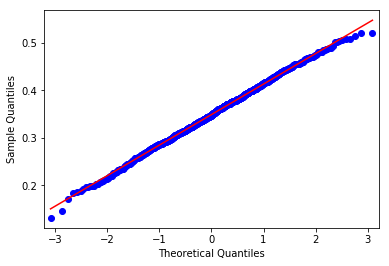

In [23]:
qqplot(bootstrap_pop, line='s')
pyplot.show()

It's important to note that in order to use the norm.pdf() function from the scipy.stats module, we are assuming the data to be normal. We should ensure that the bootstrap population that we created is in fact normally distributed. The quantile plot above shows that the bootstrap population can be very well approximated by a normal curve.

In [74]:
p_value = norm.pdf(0, bootstrap_pop.mean(), bootstrap_pop.std())

print('p_value = %s' % round(p_value, 8))

p_value = 5.24e-06


This p-value is << 0.05, therefore we can reject the null hypothesis that the true population mean temperature is 98.6 and accept the alternate hypothesis that it's not equal to 98.6.

#### Frequentist approach:

**Would you use a one-sample or two-sample test? Why?**

I would use a one-sample test since we are only interested in whether the population mean is equal to the value 98.6, and not interested in comparing two sample distributions.

**In this situation, is it appropriate to use the 𝑡 or 𝑧 statistic?**

I would use the z statistic since the sample size is large.

In [81]:
n= len(df.temperature)

z = (x_bar - 98.6)/(x_std/np.sqrt(n))

print('Z-score: %s' % round(z, 3))

Z-score: -5.455


The z-score of -5.455 corresponds to a p-value of 4.9E-8 which is much smaller than 0.05. Therefore we reach the same conclusion as the bootstrapping approach and we can reject the null hypothesis in favor of the alternate hypothesis.

Now try using the other test. How is the result be different? Why? 

In [83]:
DF = n - 1

print('Degrees of freedom for the t-stat: %s' % DF)

Degrees of freedom for the t-stat: 129


In [91]:
p_value = (1 - stats.t.sf(z, DF))*2

print('P-value for t-stat: %s' % p_value)

P-value for t-stat: 2.4106320428707306e-07


With a p-value of 2.41E-7, we reach the same conclusion as with the z test. However, the p-value itself is about an order of magnitude higher when using the t-distribution. This is likely because the sample size is not very large. The t-distribution takes into account the degrees of freedom for smaller populations. The t-distribution will approach the normal z distribution when n is very large.

### 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.

In [95]:
sample = df.temperature.sample(n=10, random_state=42)

n= len(sample)

z = (sample.mean() - 98.6)/(sample.std()/np.sqrt(n))

print('Z-score: %s' % round(z, 3))

Z-score: -1.561


This corresponds to a p-value of 0.0606 which is larger than 0.05, therefore we cannot reject the null hypothesis.

In [96]:
DF = n - 1

print('Degrees of freedom for the t-stat: %s' % DF)

Degrees of freedom for the t-stat: 9


In [97]:
p_value = (1 - stats.t.sf(z, DF))*2

print('P-value for t-stat: %s' % p_value)

P-value for t-stat: 0.153046248695619


For the T-test, the p-value comes out to 0.153 which is even larger and again we cannot reject the null hypothesis.

**Which one is the correct one to use?**

The t-test is the correct choice in this case because the population std dev is not known and the sample size is small.

**What do you notice? What does this tell you about the difference in application of the  𝑡  and  𝑧  statistic?**

The z-test will tend to give more statistically significant conclusions about the null hypothesis than the t-test. The t-test is more conservative and requires a bigger difference between the distribution and the test-value for it to be statistically significant.

The difference is that if the population std is not known, or if it is known but the sample size is small, one should use the t-test. If n is very lage, one can use the z-test.

### 5. At what temperature should we consider someone's temperature to be "abnormal"?

**As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.**

We can define the criteria for an "abnormal" temperature using a statistical definitino of an outlier. A common approach is using the rule of 1.5\*IQR. In this definition any point that is lcoated below Q1 - 1.5\*IQR or above Q3 + 1.5\*IQR, where Q1 and Q3 are the first and 3rd quartiles, is considered an outlier. For a standard normal distribution, 99.3% of all data points would lie within this range. Therefore, there is a 0.7% probability of any value lying outside of this range. We can use this definition to calculate an "abnormal" temperature.

**Bootstrap approach:**

We will generate a new bootstrap sample since what we did previously looked at the difference between bootstrap samples and the value 98.6. We can use the bootstrap sample to calculate the temperatures associated with the limits Q1 - 1.5\*IQR and Q3 + 1.5\*IQR.

In [138]:
# generate bootstrap sample of size 10,000
bootstrap_sample = df.temperature.sample(n=10000, replace=True)

In [141]:
Q1 = bootstrap_sample.quantile(0.25)
Q3 = bootstrap_sample.quantile(0.75)
IQR = Q3 - Q1

low = Q1 - 1.5*IQR
high = Q3 + 1.5*IQR

print('IQR: %s' % round(IQR, 2))
print('Q1 - 1.5*IQR: %s' % round(low, 2))
print('Q3 + 1.5*IQR: %s' % round(high, 2))

IQR: 0.9
Q1 - 1.5*IQR: 96.45
Q3 + 1.5*IQR: 100.05


Thus, based on our 1.5\*IQR definition of outliers, any temperature values below 96.45 and above 100.05 are "abnormal".

**Frequentist approach:**

We can apply the same outlier criteria to the actual temperature data.

In [142]:
Q1 = df.temperature.quantile(0.25)
Q3 = df.temperature.quantile(0.75)
IQR = Q3 - Q1

low = Q1 - 1.5*IQR
high = Q3 + 1.5*IQR

print('IQR: %s' % round(IQR, 2))
print('Q1 - 1.5*IQR: %s' % round(low, 2))
print('Q3 + 1.5*IQR: %s' % round(high, 2))

IQR: 0.9
Q1 - 1.5*IQR: 96.45
Q3 + 1.5*IQR: 100.05


We get the exact same results. Of course, in the bootstrap approach we are drawing samples from the same distribution as the original dataset so this isn't surprising.

### 6. Is there a significant difference between males and females in normal temperature?

To answer this question I'll use a two-sample t test for the difference in means. The null hypothesis is that the mean temperature of the male population is equal to the mean of the female population. The alternate hypothesis is that they are not equal.

H0: xbar_males - xbar_females = 0

HA: xbar_males - xbar_females != 0 

I will use alpha=0.05 as significance level, which corresponds to a critical value of t=+/-1.990.

In [144]:
# subset data into male and female populations
m = df[df.gender=='M'].temperature
f = df[df.gender=='F'].temperature

# calculate standard errors
m_se = (m.std()**2)/len(m)
f_se = (f.std()**2)/len(f)

# calculate t stat
t = (m.mean() - f.mean())/np.sqrt(m_se + f_se)
t

-2.285434538165274

This corresponds to a p-value of 0.025584 which is < than 0.05. Thus we cannot reject the null hypothesis that says the the female and male populations have the same mean temperature.

**What testing approach did you use and why?**

I used a two-sample t test for the difference in means because we were interested in comparing two sample populations and determining if they were different. This is a common method for doing so.

**Write a story with your conclusion in the context of the original problem.**

I found, both from a frequentist and bootstrapping approach, statistically significant evidence that the true population temperature is not equal to 98.6 degrees F. The true population temperature is likely closer to the sample population mean of 98.25 degrees F. I also used common outlier criteria (1.5\*IQR) to determine that body temperatures below 96.45 or above 100.05 are "abnormal". Finally, I can say with 95% confidence that the male and female populations have equal mean body temperatures.